# 1-1.Pythonで回帰分析の準備をしてみよう！

In [2]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
# ボストン市の住宅価格データ一式
boston = load_boston()  

# 予測の元になる多次元のデータ
X = pd.DataFrame(boston.data, columns=boston.feature_names)

# 予測の対象になる1次元のデータ
y = pd.Series(boston.target, name='MEDV')

In [4]:
X.shape

(506, 13)

In [8]:
# 説明変数の列名
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

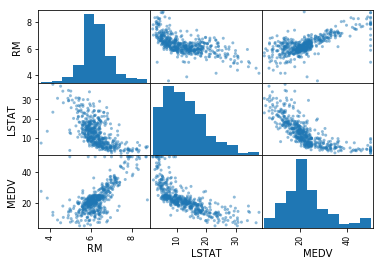

In [9]:
X = X[['RM', 'LSTAT']]

# ヒストグラムと散布図 (conact はDataframeをつなげる関数）
Xy = pd.concat([X, y.to_frame()], 1)
pd.plotting.scatter_matrix(Xy);

In [10]:
#相関係数
Xy.corr().MEDV

RM       0.695360
LSTAT   -0.737663
MEDV     1.000000
Name: MEDV, dtype: float64

# とりま、決定係数とか平均二乗誤差とか色々触ってみよう！

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# 予測データ（y_pred）をダミーで作成（seedを設定しないと、毎回違う結果になる）
np.random.seed(0)

y_pred = y + np.random.randn(len(y))*3

In [13]:
def scatter(y_pred, y):
    plt.gca().set_aspect('equal', adjustable='box')  # 縦横比を1
    plt.ylabel('y_test(true)')
    plt.xlabel('y_pred')
    plt.plot([y.min(), y.max()], [y.min(), y.max()])  # 斜め45度の青い線
    plt.plot(y_pred, y, '.') 

In [14]:
score1 = r2_score(y, y_pred)
score1

0.8945815216194627

In [15]:
score2 = mean_squared_error(y, y_pred)
score2

8.899381155543294